In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")# message="X does not have valid feature names")

In [3]:
df = pd.read_csv('Cropp.csv')
df.head()
df.tail()
df.size
df.shape
df.columns
df['label'].unique()
df.dtypes
df['label'].value_counts()
df_new = df.copy()

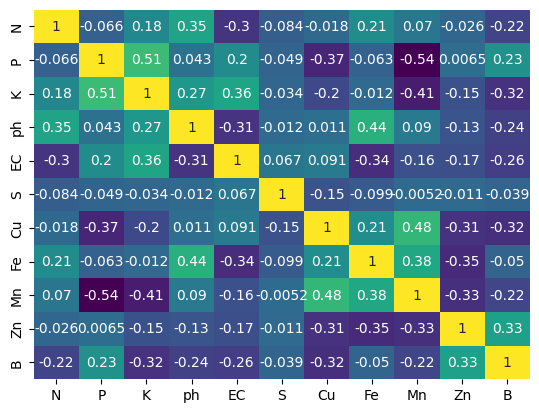

In [4]:
df_new.drop('label', axis=1, inplace=True)
sns.heatmap(df_new.corr(),annot=True, cbar=False, cmap='viridis')
features = df[['N', 'P', 'K', 'ph', 'EC', 'S', 'Cu', 'Fe', 'Mn', 'Zn', 'B']]
target = df['label']
labels = df['label']
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []
# Splitting into train and test data

In [5]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =3)
from sklearn.tree import DecisionTreeClassifier


DecisionTrees's Accuracy is:  93.54838709677419
              precision    recall  f1-score   support

      grapes       0.91      1.00      0.95        29
       mango       0.88      0.95      0.91        37
    mulberry       0.92      0.90      0.91        40
 pomegranate       1.00      0.90      0.95        29
      potato       0.96      1.00      0.98        26
        ragi       1.00      0.88      0.94        25

    accuracy                           0.94       186
   macro avg       0.94      0.94      0.94       186
weighted avg       0.94      0.94      0.94       186



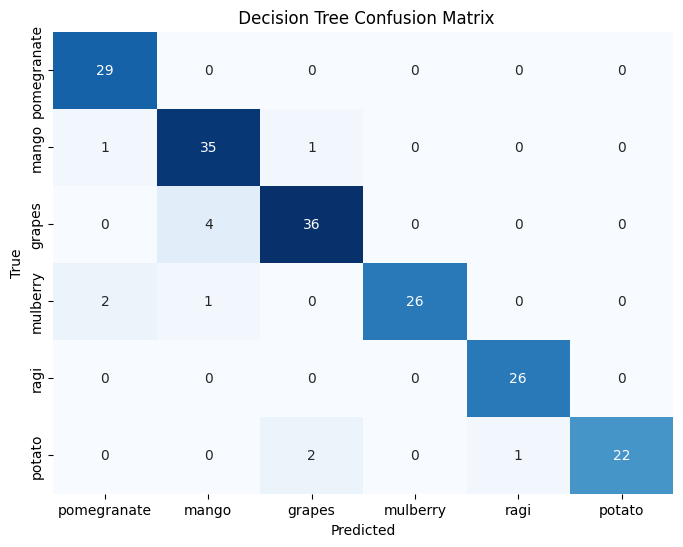

In [6]:


DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

# Create confusion matrix
cm = confusion_matrix(Ytest,predicted_values)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False, xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title(' Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Naive Bayes's Accuracy is:  0.967741935483871
              precision    recall  f1-score   support

      grapes       0.91      1.00      0.95        29
       mango       0.97      0.95      0.96        37
    mulberry       0.98      1.00      0.99        40
 pomegranate       1.00      0.90      0.95        29
      potato       0.96      1.00      0.98        26
        ragi       1.00      0.96      0.98        25

    accuracy                           0.97       186
   macro avg       0.97      0.97      0.97       186
weighted avg       0.97      0.97      0.97       186



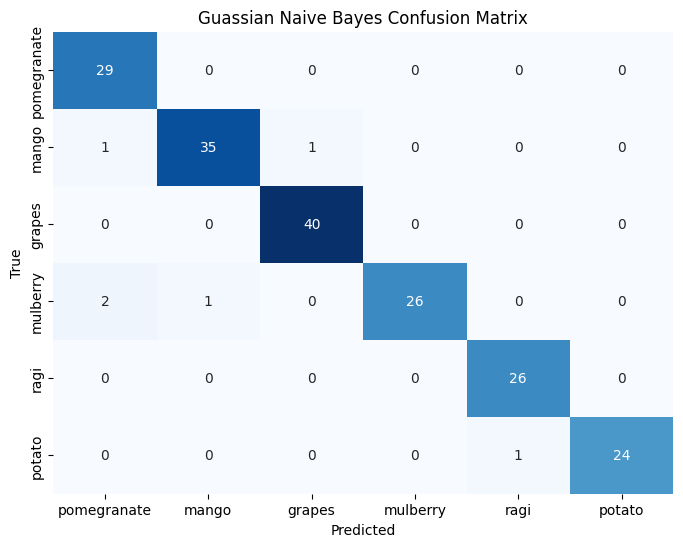

In [ ]:

from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

# Create confusion matrix
cm = confusion_matrix(Ytest,predicted_values)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Guassian Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

SVM's Accuracy is:  0.9139784946236559
              precision    recall  f1-score   support

      grapes       0.81      1.00      0.89        29
       mango       0.97      0.92      0.94        37
    mulberry       0.90      0.90      0.90        40
 pomegranate       0.93      0.86      0.89        29
      potato       0.96      0.96      0.96        26
        ragi       0.95      0.84      0.89        25

    accuracy                           0.91       186
   macro avg       0.92      0.91      0.91       186
weighted avg       0.92      0.91      0.91       186



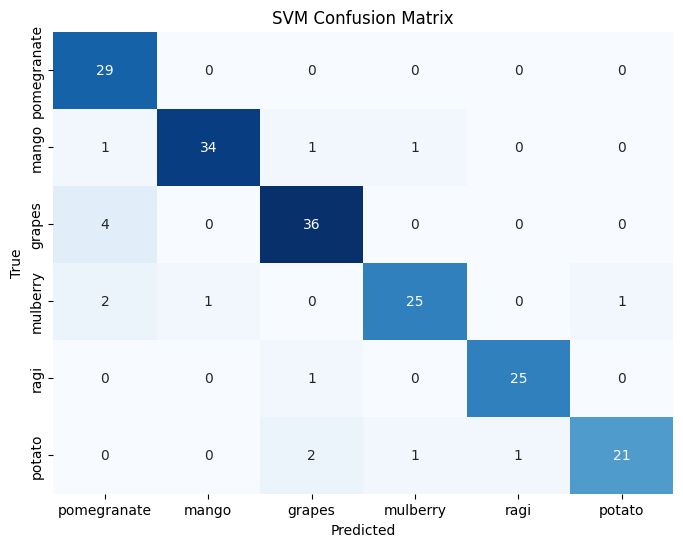

In [7]:



from sklearn.svm import SVC

SVM = SVC(kernel='poly', degree=3, gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

# Create confusion matrix
cm = confusion_matrix(Ytest,predicted_values)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False, xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Logistic Regression's Accuracy is:  0.956989247311828
              precision    recall  f1-score   support

      grapes       0.91      1.00      0.95        29
       mango       0.97      0.95      0.96        37
    mulberry       0.98      1.00      0.99        40
 pomegranate       1.00      0.83      0.91        29
      potato       0.96      1.00      0.98        26
        ragi       0.92      0.96      0.94        25

    accuracy                           0.96       186
   macro avg       0.96      0.96      0.95       186
weighted avg       0.96      0.96      0.96       186



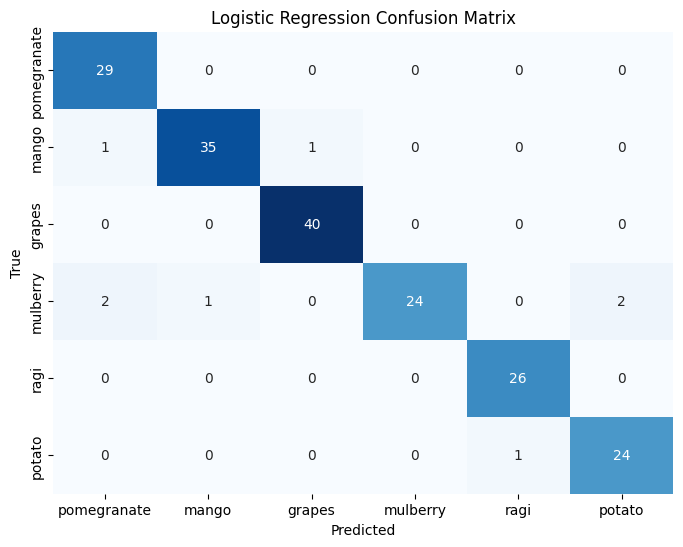

In [ ]:




from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

# Create confusion matrix
cm = confusion_matrix(Ytest,predicted_values)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False, xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

RF's Accuracy is:  0.967741935483871
              precision    recall  f1-score   support

      grapes       0.91      1.00      0.95        29
       mango       0.97      0.95      0.96        37
    mulberry       0.98      1.00      0.99        40
 pomegranate       1.00      0.90      0.95        29
      potato       0.96      1.00      0.98        26
        ragi       1.00      0.96      0.98        25

    accuracy                           0.97       186
   macro avg       0.97      0.97      0.97       186
weighted avg       0.97      0.97      0.97       186



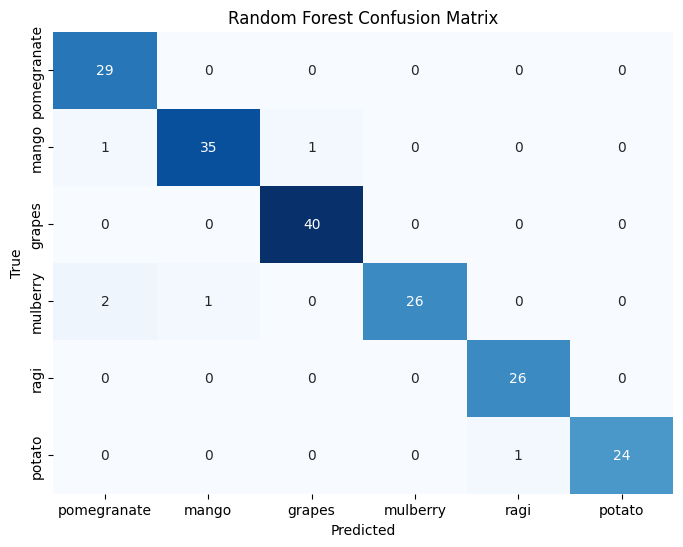

+---------------+----------+
|      Name     | Accuracy |
+---------------+----------+
| Decision Tree |   0.94   |
|      SVM      |   0.91   |
|       RF      |   0.97   |
+---------------+----------+


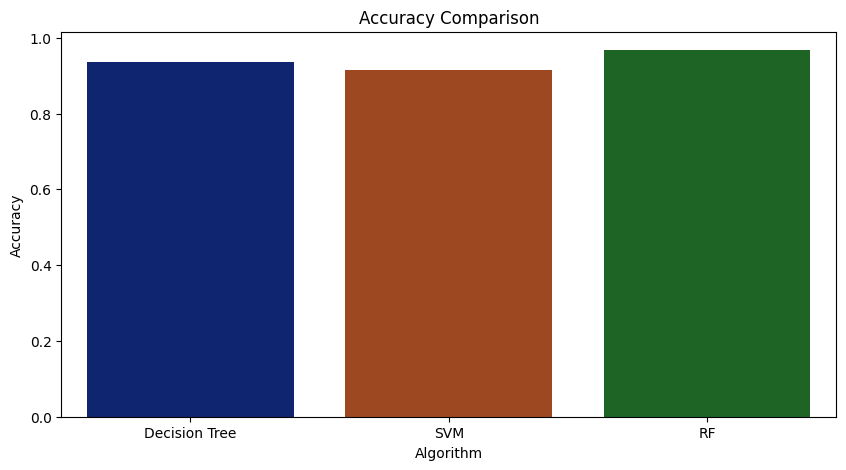

In [11]:


from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

# Create confusion matrix
cm = confusion_matrix(Ytest,predicted_values)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x = model,y = acc,palette='dark')

accuracy_models = dict(zip(model, acc))

from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Name", "Accuracy"]

for k,v in accuracy_models.items():
    v = round(v, 2)
    table.add_row([k,v])
    
print(table)

In [12]:
data = np.array([[150,70,217,6,0.6,0.25,10,116,60,55,22]])
prediction = RF.predict(data)
print(prediction)



['pomegranate']


In [ ]:
data = np.array([[50,20,130,5,2,0.1,26,40,206,32,20]])
prediction = RF.predict(data)
print(prediction)



['potato']


In [13]:
data = np.array([[150,70,217,6,0.6,0.25,10,116,60,55,22]])
prediction = NaiveBayes.predict(data)
print(prediction)



NameError: name 'NaiveBayes' is not defined

In [ ]:
data = np.array([[50,20,130,5,2,0.1,26,40,206,32,20]])
prediction = NaiveBayes.predict(data)
print(prediction)



['potato']


In [14]:
import tkinter as tk
from tkinter import ttk

# Assuming RF is defined and trained in your previous code

def predict_crop():
    try:
        # Get values from entry fields
        data = [float(entry.get()) for entry in entry_fields]

        # Validate pH value (4th element in the list, index 3)
        ph_value = data[3]
        if not (0 <= ph_value <= 14):
            result_label.config(text="Invalid input: pH must be between 0 and 14", foreground="red")
            return

        # Make prediction
        prediction = RF.predict([data])

        # Update result label
        result_label.config(text=f'Predicted Crop: {prediction[0]}', foreground="black")

    except ValueError:
        result_label.config(text="Invalid input: Enter numeric values only", foreground="red")



In [15]:
# Create main window
root = tk.Tk()
root.title("Crop Prediction")
root.geometry("500x400")

# Create entry fields for each feature
labels = ['N (Nitrogen)', 'P (Phosphorus)', 'K (Potassium)', 'pH', 'EC (Electrical Conductivity)', 'S (Sulfur)', 
          'Cu (Copper)', 'Fe (Iron)', 'Mn (Manganese)', 'Zn (Zinc)', 'B (Boron)']
entry_fields = []
units = ['ppm', 'ppm', 'ppm', '', 'mS/cm', 'ppm', 'ppm', 'ppm', 'ppm', 'ppm', 'ppm']

for idx, label in enumerate(labels):
    ttk.Label(root, text=f"Enter the value for {label} ({units[idx]}):").grid(row=idx, column=0, padx=10, pady=5, sticky="e")
    entry = ttk.Entry(root)
    entry.grid(row=idx, column=1, padx=10, pady=5, sticky="w")
    entry_fields.append(entry)

# Button to predict
predict_button = ttk.Button(root, text="Predict", command=predict_crop)
predict_button.grid(row=len(labels), column=0, columnspan=2, pady=10)

# Label to display prediction
result_label = ttk.Label(root, text="", foreground="black")
result_label.grid(row=len(labels)+1, column=0, columnspan=2)

root.mainloop()